In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt 
from colorama import Fore

In [17]:
df = pd.read_csv('measurements.csv')
df1 = df.copy()
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [18]:
df2 = pd.read_excel('measurements2.xlsx')
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [19]:
nan_cols = df.isna().mean()*100
nan_cols[nan_cols > 0] 

temp_inside       3.092784
specials         76.030928
refill liters    96.649485
refill gas       96.649485
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [21]:
df.duplicated().any()

False

In [22]:
df.drop(columns= nan_cols[nan_cols > 75].index, axis=1, inplace = True)

In [23]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [24]:
nan_cols = df.isna().mean()*100
nan_cols[nan_cols > 0] 

temp_inside    3.092784
dtype: float64

In [25]:
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')
df["distance"]=df["distance"].astype(np.float)
df["consume"]=df["consume"].astype(np.float)
df["temp_inside"]=df["temp_inside"].astype(np.float)
df["temp_inside"]=df["temp_inside"].fillna(np.mean(df["temp_inside"]))

print(df.dtypes)
print(df.isnull().sum())
df.head(10)

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object
distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64


C:\Users\franc\AppData\Local\Temp\ipykernel_8184\1637686503.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["distance"]=df["distance"].astype(np.float)
C:\Users\franc\AppData\Local\Temp\ipykernel_8184\1637686503.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["consume"]=df["consume"].astype(np.float)
C:\Users\franc\AppData\L

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
5,8.3,6.4,50,21.5,10,E10,0,0,0
6,7.8,4.4,43,21.5,11,E10,0,0,0
7,12.3,5.0,40,21.5,6,E10,0,0,0
8,4.9,6.4,26,21.5,4,E10,0,0,0
9,11.9,5.3,30,21.5,9,E10,0,0,0


In [26]:
df['temp_inside'] = df['temp_inside'].astype(float)


In [27]:
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [ ]:
df.

In [29]:
def print_corr(df):
    
    '''
    this functions plosts a correlation head map with pearson method
    '''
   
    correlation = df.corr(method='pearson')

    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(10, 12))

    cmap = sns.diverging_palette(180, 20, as_cmap=True)
    sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    return plt.show()

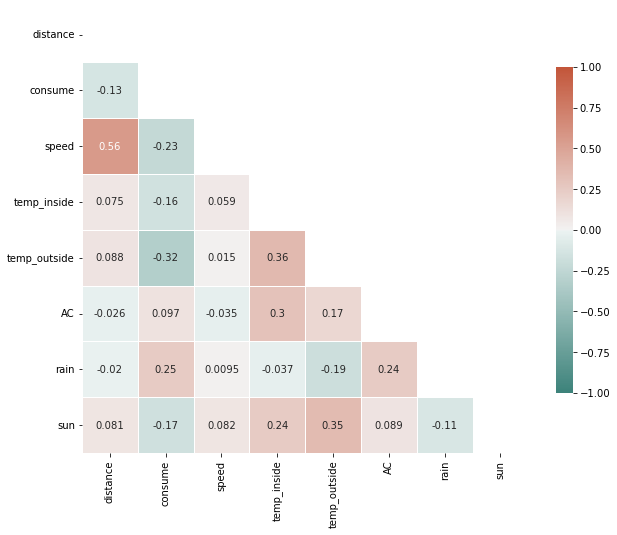

In [30]:
print_corr(df)

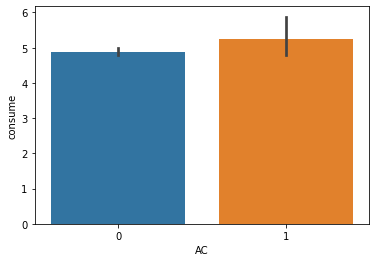

In [33]:
sns.barplot(data=df, 
                x='AC', 
                y='consume');

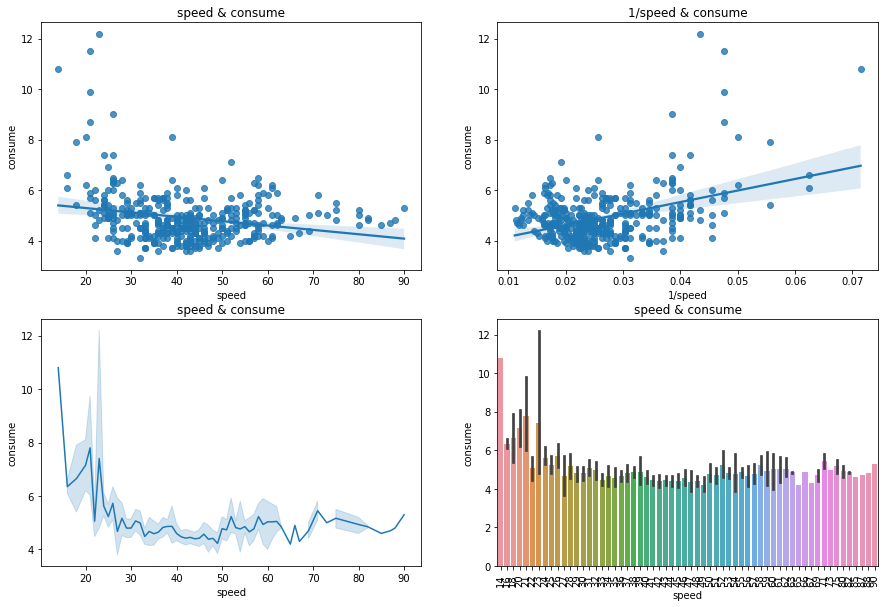

In [47]:
# speed&consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)

sns.regplot(x=df['speed'], y=df['consume'],ax=ax1)
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['speed'], y=df['consume'],ax=ax2)
plt.xlabel("1/speed")
plt.ylabel("consume")
plt.title("1/speed & consume")
ax3=plt.subplot(2,2,3)
sns.lineplot(x=df['speed'], y=df['consume'],ax=ax3)
plt.title("speed & consume")
ax4=plt.subplot(2,2,4)
sns.barplot(x=df['speed'], y=df['consume'],ax=ax4)
plt.title("speed & consume")
ax4.tick_params(axis='x', rotation=90)


Text(0.5, 1.0, 'temp_outside & consume')

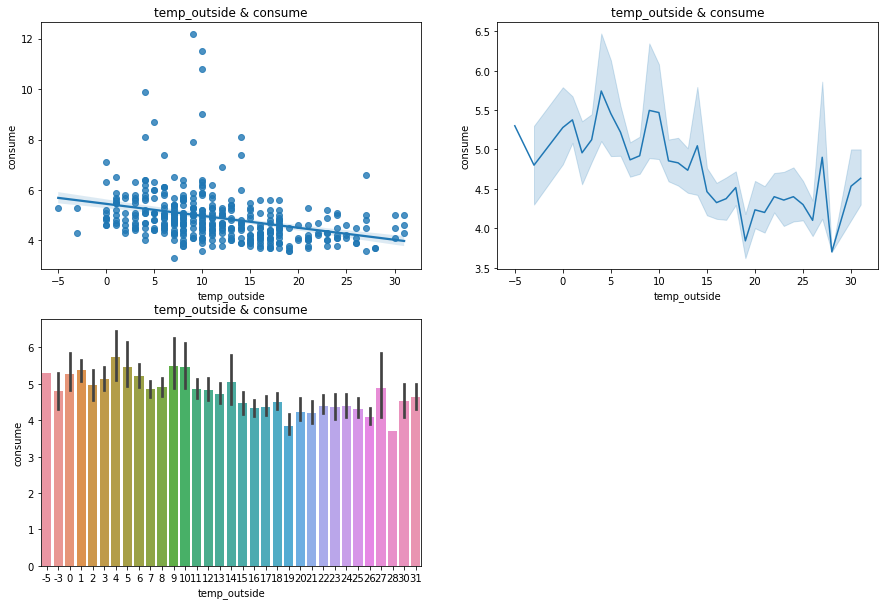

In [35]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)

sns.regplot(x=df['temp_outside'], y=df['consume'],ax=ax1)
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")
ax2=plt.subplot(2,2,2)
sns.lineplot(x=df['temp_outside'], y=df['consume'],ax=ax2)
plt.title("temp_outside & consume")
ax3=plt.subplot(2,2,3)
sns.barplot(x=df['temp_outside'], y=df['consume'],ax=ax3)
plt.title("temp_outside & consume")

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AC             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
amin     3.30000   4.000000
amax    11.50000  12.200000


C:\Users\franc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'AC & consume')

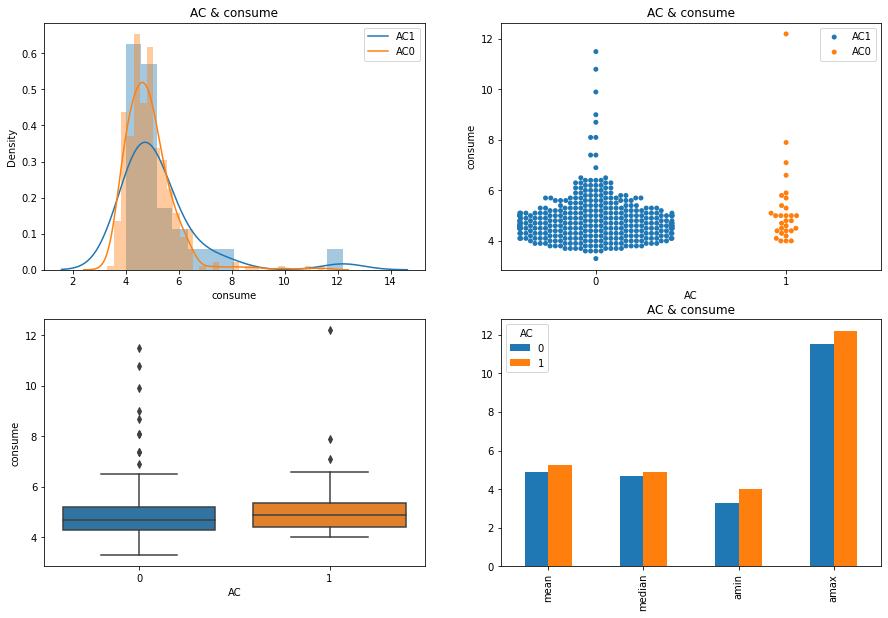

In [49]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.AC==1].consume,ax=ax1)
sns.distplot(df[df.AC==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.AC,y=df.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.AC,y=df.consume,ax=ax3)

ax4=plt.subplot(2,2,4)
c=df.groupby("AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax4)
plt.title("AC & consume")

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\franc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'rain & consume')

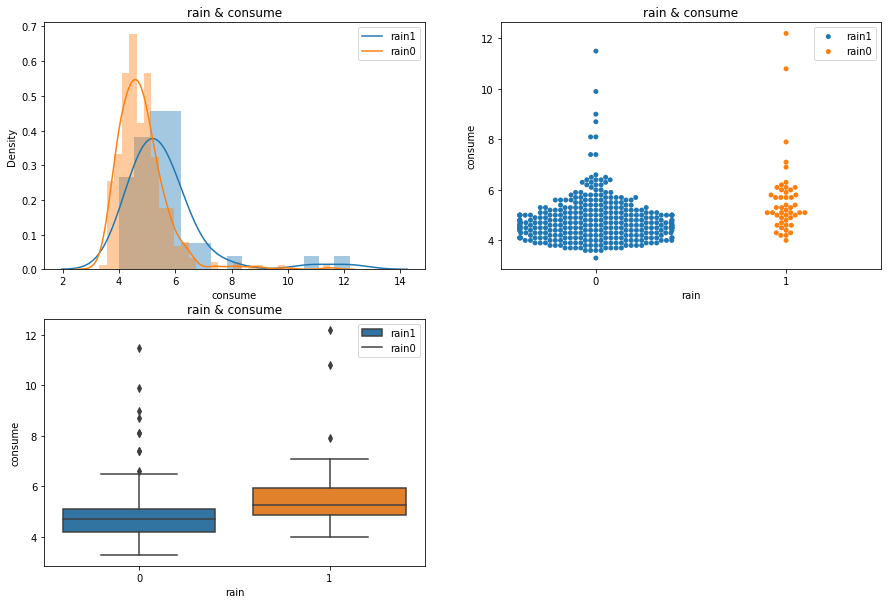

In [40]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.rain==1].consume,ax=ax1)
sns.distplot(df[df.rain==0].consume,ax=ax1)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.rain,y=df.consume,ax=ax2)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.rain,y=df.consume,ax=ax3)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

Text(0.5, 1.0, 'distance & consume')

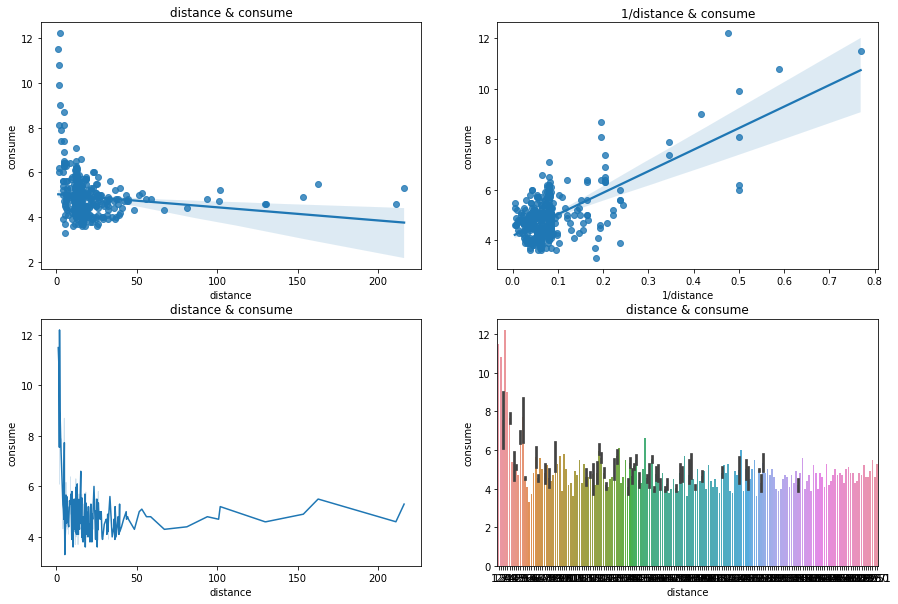

In [41]:
# distance&consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
# 包含单regression line的scatterplot：
sns.regplot(x=df['distance'], y=df['consume'],ax=ax1)
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['distance'], y=df['consume'],ax=ax2)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")
ax3=plt.subplot(2,2,3)
sns.lineplot(x=df['distance'], y=df['consume'],ax=ax3)
plt.title("distance & consume")
ax4=plt.subplot(2,2,4)
sns.barplot(x=df['distance'], y=df['consume'],ax=ax4)
plt.title("distance & consume")

In [51]:
closedf = df[['distance','consume']]


(388, 1)


In [60]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


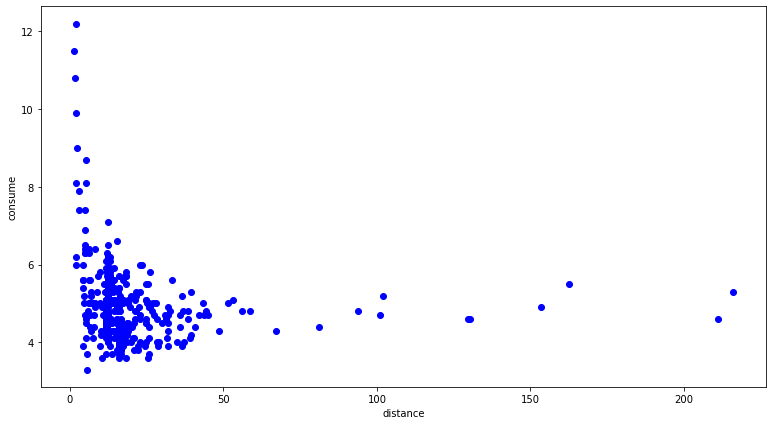

In [76]:
plt.scatter(df.distance, df.consume,  color='blue')
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

In [77]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [81]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['distance','speed','temp_outside']])
y = np.asanyarray(train[['consume']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.00154885 -0.01950657 -0.04624794]]
Intercept:  [6.23739835]


In [82]:
y_hat= regr.predict(test[['distance','speed','temp_outside']])
x = np.asanyarray(test[['distance','speed','temp_outside']])
y = np.asanyarray(test[['consume']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.86
Variance score: 0.13


C:\Users\franc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
